In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import numpy as np

In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from scipy.stats import zscore

In [6]:
import seaborn as sns

In [7]:

NNH = KNeighborsClassifier(n_neighbors= 5 )


In [32]:
bc_df = pd.read_csv("d:\gli\dse\data\wisc_bc_data.csv")

In [33]:
bc_df.shape

(569, 32)

In [34]:
bc_df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [35]:
bc_df.diagnosis=bc_df.diagnosis.map({'M':1,'B':0})

bc_df['diagnosis'] = bc_df.diagnosis.astype('category')


drop the first column from the data frame. This is Id column which is not used in modeling

In [36]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

bc_df = bc_df.drop(labels = "id", axis = 1)


In [37]:
bc_df.shape

(569, 31)

In [38]:
# Create a separate dataframe consisting only of the features i.e independent attributes

bc_feature_df = bc_df.drop(labels= "diagnosis" , axis = 1)

In [39]:
# applying Zscore to the entire data before splitting leading to data leak

bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 

bc_feature_df_z.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.162905e-16,-7.373520e-16,-1.303390e-16,-2.239958e-16,1.598019e-16,1.730699e-16,3.707247e-17,-5.775501e-17,1.449729e-16,-1.523630e-15,...,-8.507157e-17,6.634022e-18,-3.570665e-16,-1.888745e-16,-2.265323e-16,-4.487720e-18,9.112024e-17,2.302396e-16,2.718973e-16,1.882891e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [40]:
# Capture the class values from the 'diagnosis' column into a pandas series akin to array 

bc_labels = bc_df["diagnosis"]

In [41]:
# store the normalized features data into np array 

X = np.array(bc_feature_df_z)
X.shape

(569, 30)

In [42]:
# store the bc_labels data into a separate np array

y = np.array(bc_labels)
y.shape

(569,)

In [43]:
# Split X and y into training and test set in 75:25 ratio - Note - the X_train is already influenced by data in test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [44]:
y_train

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from statistics import mean, stdev

score_dict = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


# empty list that will hold cv scores
results = []

skf = StratifiedKFold(n_splits=50, random_state=1)

results = cross_validate(NNH, X_train, y_train, cv=skf , scoring=score_dict)



d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [46]:
for key in results:
    print(key , mean(results[key]) , stdev(results[key]) )
    print(''.format(key, mean(results[key])*100.0, stdev(results[key])*100.0))



fit_time 0.0028128433227539063 0.0018158990356678493

score_time 0.004592800140380859 0.0021835677527032612

test_accuracy 0.9725 0.06333624232488642

test_precision 0.9883333333333333 0.05834547978496594

test_recall 0.9416666666666667 0.1431049438115632

test_f1_score 0.9576190476190476 0.10223224674039844



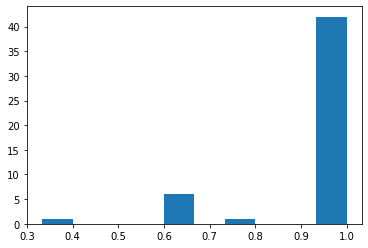

95.0 confidence interval for recall metric 66.7% and 100.0%


In [47]:
import matplotlib.pyplot as plt

# plot scores
plt.hist(results['test_recall'])
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results['test_recall'], p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results['test_recall'], p))
print('%.1f confidence interval for recall metric %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

# Let us repeat without causing data leak

In [48]:
X = np.array(bc_feature_df)   # Creating array X from original data set
X.shape

# store the bc_labels data into a separate np array

y = np.array(bc_labels)
y.shape

(569,)

In [49]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [50]:
# Apply Zscore separately on X_train and X_test

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()



In [51]:
X_train_z = scaler.fit_transform(X_train)
X_test_z = scaler.fit_transform(X_test)

In [52]:
results = []

skf = StratifiedKFold(n_splits=50, random_state=1)

results = cross_validate(NNH, X_train, y_train, cv=skf , scoring=score_dict)


d:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [53]:
for key in results:
    print(key , mean(results[key]) , stdev(results[key]) )
    print(''.format(key, mean(results[key])*100.0, stdev(results[key])*100.0))


fit_time 0.0024158763885498047 0.0017894825359453224

score_time 0.0048046398162841794 0.002167545760327807

test_accuracy 0.9242857142857143 0.09258200997725514

test_precision 0.93 0.13080077804590828

test_recall 0.8833333333333333 0.1844277783908294

test_f1_score 0.8934285714285715 0.13847135536678729



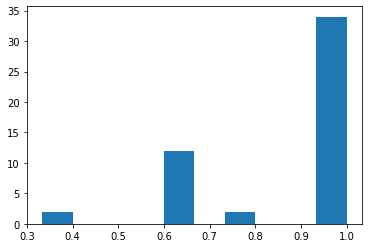

95.0 confidence interval for recall metric 40.8% and 100.0%


In [54]:
import matplotlib.pyplot as plt

# plot scores
plt.hist(results['test_recall'])
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results['test_recall'], p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results['test_recall'], p))
print('%.1f confidence interval for recall metric %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))